In [ ]:
import numpy as np
import math
import random
import time
from statistics import mean
import matplotlib.pyplot as plt
from decimal import Decimal

In [ ]:
# 1. Constant
func1 = lambda x: 1         

In [ ]:
# 2. Sum
func2 = lambda x: np.sum(x)

In [ ]:
# 3. Multiplication
func3 = lambda x: np.prod(x)

In [ ]:
# 4.1 Polinomial by direct calculation
def func4_1(x):
    res = Decimal(0)
    for i in range(len(x) - 1):
      res += Decimal(x[i])*(Decimal(1.5)**i)
    return res

In [ ]:
# 4.2 Polinominal by Horner's method
def func4_2(x):
  res = x[-1]
  for i in range(-2, -len(x)-1, -1):
    res = x[i] + 1.5 * res
  return res



In [ ]:
# 5. Bubble Sort
def func5(x):
    while x[0] != min(x):
        n = len(x)
        for i in range(n-1): 
          if x[i] > x[i+1]:
            x[i], x[i+1] = x[i+1], x[i]
    return x

In [ ]:
# 6. Quick Sort
def func6(x):
  if len(x) <= 1:
        return x  
  less = []
  eq = [] 
  gr = []
  a = random.choice(x)
  for i in range(len(x)):
    if x[i] > a:
      gr.append(x[i])
    elif x[i] == a:
      eq.append(x[i])
    else:
      less.append(x[i])
  
  return func6(less) + eq + func6(gr)

In [ ]:
# 7. Timsort
# code is taken from https://www.geeksforgeeks.org/timsort/
# Python3 program to perform basic timSort
# Iterative Timsort function to sort the
# array[0...n-1] (similar to merge sort)
def func7(arr):
  
  MIN_MERGE = 32

  def calcMinRun(n):
    """Returns the minimum length of a
    run from 23 - 64 so that
    the len(array)/minrun is less than or
    equal to a power of 2.

    e.g. 1=>1, ..., 63=>63, 64=>32, 65=>33,
    ..., 127=>64, 128=>32, ...
    """
    r = 0
    while n >= MIN_MERGE:
      r |= n & 1
      n >>= 1
    return n + r


  # This function sorts array from left index to
  # to right index which is of size atmost RUN
  def insertionSort(arr, left, right):
    for i in range(left + 1, right + 1):
      j = i
      while j > left and arr[j] < arr[j - 1]:
        arr[j], arr[j - 1] = arr[j - 1], arr[j]
        j -= 1


  # Merge function merges the sorted runs
  def merge(arr, l, m, r):
    
    # original array is broken in two parts
    # left and right array
    len1, len2 = m - l + 1, r - m
    left, right = [], []
    for i in range(0, len1):
      left.append(arr[l + i])
    for i in range(0, len2):
      right.append(arr[m + 1 + i])

    i, j, k = 0, 0, l
    
    # after comparing, we merge those two array
    # in larger sub array
    while i < len1 and j < len2:
      if left[i] <= right[j]:
        arr[k] = left[i]
        i += 1

      else:
        arr[k] = right[j]
        j += 1

      k += 1

    # Copy remaining elements of left, if any
    while i < len1:
      arr[k] = left[i]
      k += 1
      i += 1

    # Copy remaining element of right, if any
    while j < len2:
      arr[k] = right[j]
      k += 1
      j += 1

  # Now the final part
  n = len(arr)
  minRun = calcMinRun(n)
	
	# Sort individual subarrays of size RUN
  for start in range(0, n, minRun):
    end = min(start + minRun - 1, n - 1)
    insertionSort(arr, start, end)

	# Start merging from size RUN (or 32). It will merge
	# to form size 64, then 128, 256 and so on ....
  size = minRun
  while size < n:
		
		# Pick starting point of left sub array. We
		# are going to merge arr[left..left+size-1]
		# and arr[left+size, left+2*size-1]
		# After every merge, we increase left by 2*size
    for left in range(0, n, 2 * size):

			# Find ending point of left sub array
			# mid+1 is starting point of right sub array
      mid = min(n - 1, left + size - 1)
      right = min((left + 2 * size - 1), (n - 1))

			# Merge sub array arr[left.....mid] &
			# arr[mid+1....right]
      if mid < right:
        merge(arr, left, mid, right)
      
      size = 2 * size
  return arr

In [ ]:
# II. Matrix product
def func_II(A_B):
  return A_B[0].dot(A_B[1]) 

In [ ]:
runs = 5
algs = [func1, func2, func3, func4_1, func4_2, func5, func6, func7, func_II]
algs_title = ['Constant function', 'Sum function', 'Multiplication function', 
              'Polinomial by direct calculation', 'Polinomial by Horner’s method', 
              'Bubble Sort', 'Quick Sort', 'Timsort', 'Matrix product']

In [ ]:
# Time Function 
def time_func(alg, data):
    start = time.perf_counter()
    alg(data)
    return time.perf_counter() - start


In [ ]:
# Average time for 5 runs
def avg_time(alg, n):
    '''
    n stands for the dimension of data
    '''
    if alg == func_II:
        data = np.random.rand(n, n), np.random.rand(n, n)
    else:
        data = np.random.rand(n)
    time_array = np.zeros(5)
    for i in range(5):
      time_array[i] = time_func(alg, data)
    return np.mean(time_array)
   


In [ ]:
# Making measures in n dimensions
def arr_of_measures(alg):
    n_arr = np.array(list(range(1,2001)))
    res = np.zeros(len(n_arr)  + 1)
    for i in range(len(n_arr)):
        res[n_arr[i]] = avg_time(alg, n_arr[i])
    return res

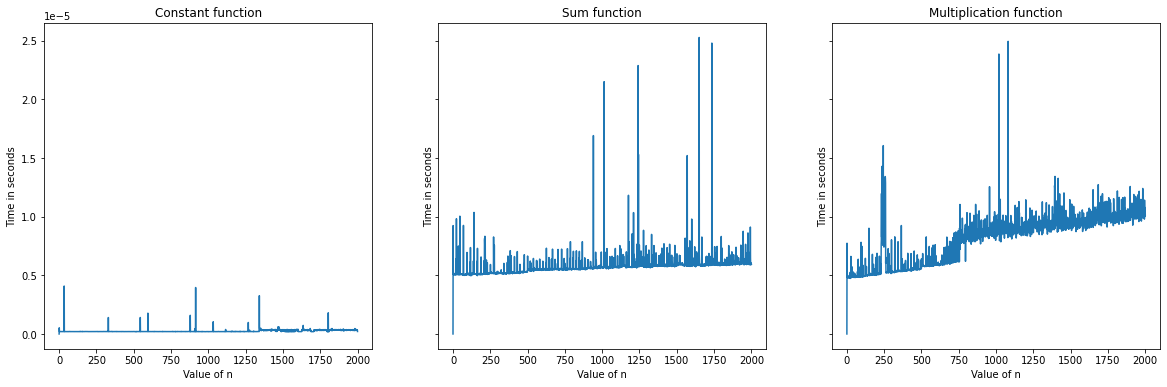

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for j, ax in zip([0, 1, 2], axes):
    ax.plot(arr_of_measures(algs[j]))
    ax.set_title(algs_title[j])
    ax.set_xlabel('Value of n')
    ax.set_ylabel('Time in seconds')


Text(0, 0.5, 'Time in seconds')

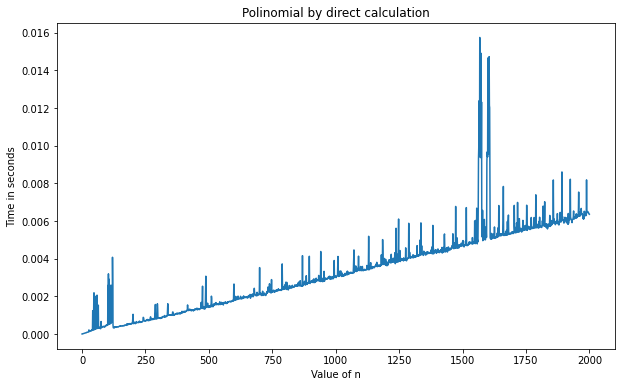

In [ ]:
%%time
fig, ax = plt.subplots(figsize=(10, 6))
i = 3
ax.plot(arr_of_measures(algs[i]))
ax.set_title(algs_title[i])
ax.set_xlabel('Value of n')
ax.set_ylabel('Time in seconds')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


Text(0, 0.5, 'Time in seconds')

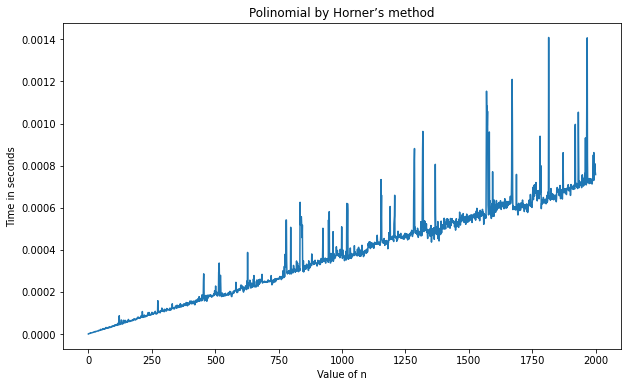

In [ ]:
%%time
fig, ax = plt.subplots(figsize=(10, 6))
i = 4
ax.plot(arr_of_measures(algs[i]))
ax.set_title(algs_title[i])
ax.set_xlabel('Value of n')
ax.set_ylabel('Time in seconds')

Text(0, 0.5, 'Time in seconds')

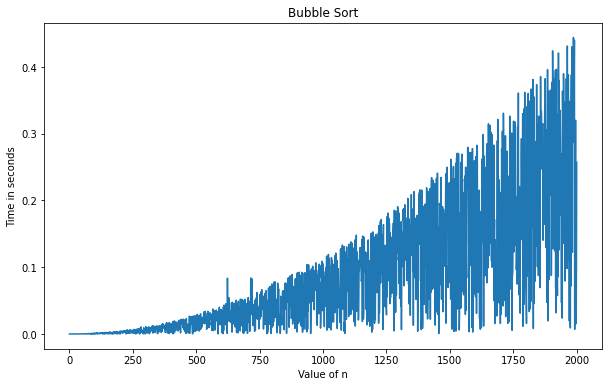

In [ ]:
%%time
fig, ax = plt.subplots(figsize=(10, 6))
i = 5
ax.plot(arr_of_measures(algs[i]))
ax.set_title(algs_title[i])
ax.set_xlabel('Value of n')
ax.set_ylabel('Time in seconds')

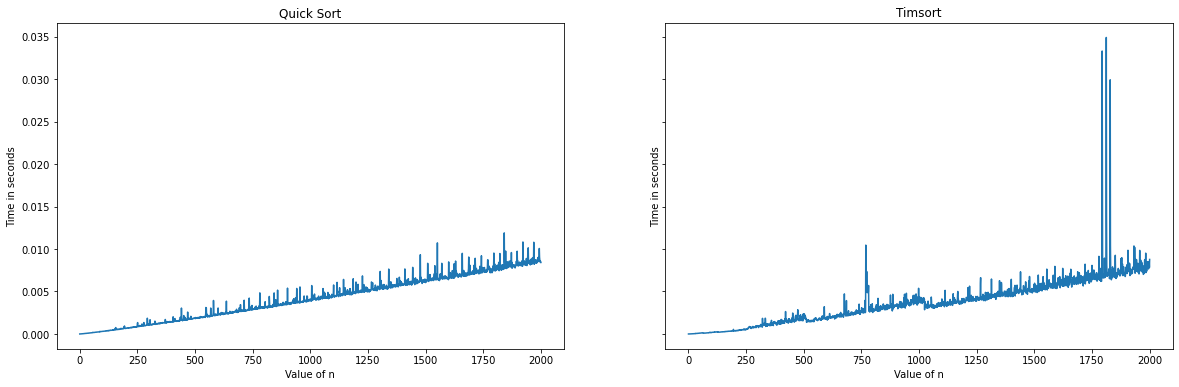

In [ ]:
%%time
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

for j, ax in zip([6, 7], axes):
    ax.plot(arr_of_measures(algs[j]))
    ax.set_title(algs_title[j])
    ax.set_xlabel('Value of n')
    ax.set_ylabel('Time in seconds')

Text(0, 0.5, 'Time in seconds')

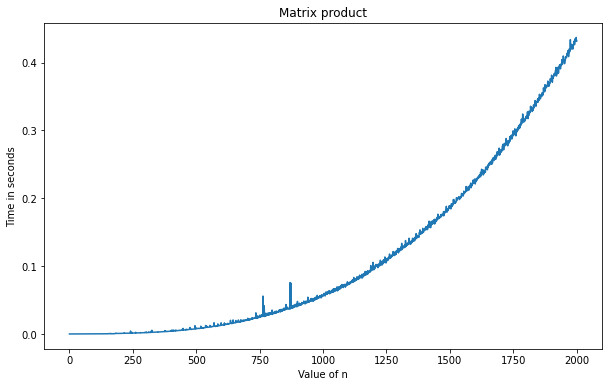

In [ ]:
%%time
fig, ax = plt.subplots(figsize=(10, 6))
i = -1
ax.plot(arr_of_measures(algs[i]))
ax.set_title(algs_title[i])
ax.set_xlabel('Value of n')
ax.set_ylabel('Time in seconds')